<a href="https://colab.research.google.com/github/tijana14/ml-product-reviews-project/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First ML project
by Tijana Dajic

## 📝 Loading and Inspecting the Dataset

Before diving into analysis, we first need to load the dataset and take a look at its structure.

In this step we will:
- Load the CSV file from the GitHUB.
- Check how many rows and columns we have.
- Display the first five rows.
- Review data types an basic matadata for each column.

This will help us ensure the dataset is corectly loaded and ready for futher exploration.

In [10]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/tijana14/ml-product-reviews-project/main/data/product_reviews_full.csv"
df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())

Number of rows: 171380
First 5 rows:
                            review_uuid  \
0  31b07b9a-4567-4db1-81f6-1bcef33b3e7b   
1  1cb2b4b5-9805-4c2d-9393-6b1382cb7c53   
2  f64165f0-29a2-4cfb-8b15-13c0c893e54d   
3  e442e083-a343-4052-b015-41e531e52d3e   
4  f4abefb8-22f0-4672-af73-2aa2954b24e0   

                                        product_name product_price  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   

      review_title                                        review_text  \
0           Super!  great cooler excellent air flow and for this p...   
1          Awesome              best budget 2 fit cooler nice cooling   
2             Fair  the quality is good but the power of air is 

In [11]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/tijana14/ml-product-reviews-project/main/data/product_reviews_full.csv"

df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


## 🔎 Checking for missing values

Missing data can cause problems during model training or analysis.

Here, we will:
- Count the number of missing values (NaN) per column
- Visualize missing values using heatmap

This will help us indentify any columns that require cleaning or imputation.

In [12]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


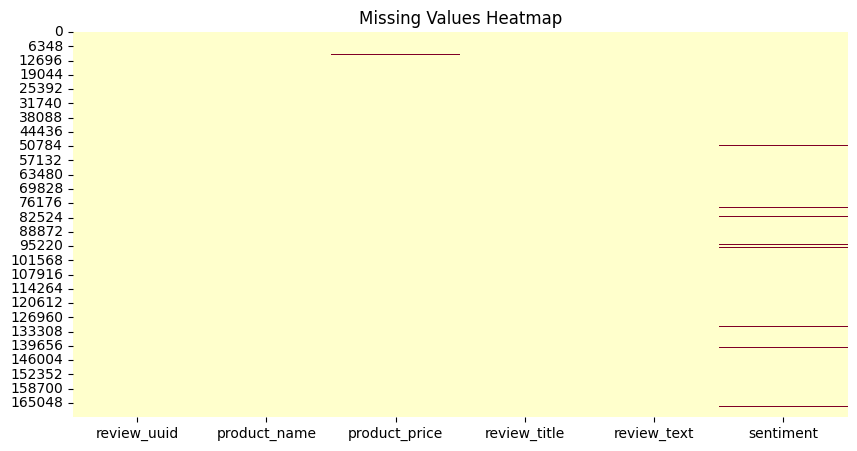

In [13]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

## 📊 Sentiment analysis

Let's check how many reviews are labeled positive vs negative vs neutral.

This helps us:
- Understand balance between classes
- Detect if the dataset is skewed

In [14]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


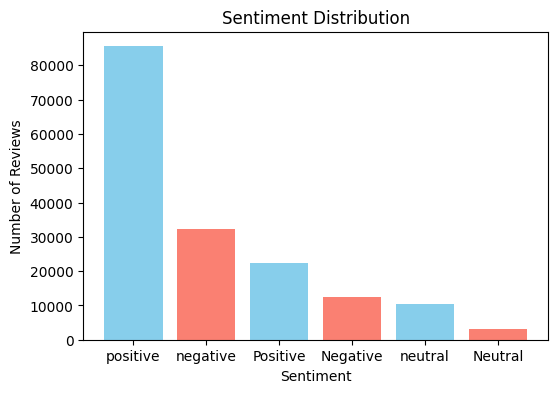

In [17]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## 🎯 Exploring the product_price column

Before we can use the price data in any meaningful way, we need to understan how it is stored and formatted.

In this section we will:

 - Check the data type of product_price column.
 - Preview a few sample values.
 - Indentify the most common price etries.
 - Detect non-numeric or problematic values such as "Free", "N/A" or corupted symbols.

🔨 This is an important part of data cleaning. Even if a value *looks* like a number (e.g. "$13999.99"), it may still be stored as a string and couse problems during numeric analysis or modeling.

Let's investigate what we working with!

In [15]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))


Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3           1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


## 🛠 Removing missing values

We already analyzed missing data in previous step.

Now we will simply drop all rows that contain missing values,

and check the new shape and count missing values per column.

In [16]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


In [18]:
import pandas as pd


# load dataset from GitHub
url = "https://raw.githubusercontent.com/vladimir-dresevic/ml-product-reviews-project/main/data/product_reviews_full.csv"


df = pd.read_csv(url)

# Count the number of rows before removing missing values
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")

 Randomly selected rows containing missing values:

                                 review_uuid  \
138622  be155fca-c19b-4ca5-8a11-dcda5f334e18   
48332   0fcacd59-eb69-4c73-adb7-8bdd6c86cdbd   
10021   772ca541-7296-4065-b969-2eaef308623a   
9637    05b646fc-66a0-4d3b-a97a-ccb6b367eaa2   
156343  3a97cd00-5eea-4533-889c-c3ed7eedda36   

                                             product_name product_price  \
138622  SAMSUNG 253 L Frost Free Double Door 3 Star Re...      $295.06    
48332   Men Solid Single Breasted Casual Blazer??????(...       $38.54    
10021   CEAT Hitman Full Size Double Blade Poplar Cric...          3.96   
9637    Hindware Ripple 90 Auto Clean Wall Mounted Chi...        172.28   
156343  APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...      $361.33    

                  review_title                            review_text  \
138622               Very Good  good design and effective performance   
48332                      Nan                                

## 🖋 Parsing the product_price column

We noticed that some product prices are stored as numbers,

while others contains curency prefix like '$' (e.g. "$48.18").

To make this column usable we will:

 - Remove the "$" text and any other caracter.
 - Convert all values to numbers (float)
 - Drop invalid rows if convertion fails.


In [19]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)

In [20]:
# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())


Column type after parsing: float64

Price summary:
count    170954.000000
mean         65.709872
std         135.789769
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


## ✅ Standardizing a sentiment column

The sentiment column should only contain "positiv", "negativ" and "neutral" values.

We will:

- Convert all values to lowercase.
- Convert column type to category.
- Check results.




In [21]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
nan           4994
Name: count, dtype: int64

Sentiment column converted to type: category


## 🧹 Removing irrelevant columns

We will now remove columns that are not useful for model training.

- rewiew_uuid - just a unique ID.
- product_name - too specific and inconsistent.

The key features we want to keep are:
- review_title - short description of whole review.
- review_text - the main input for sentiment prediction.
- product_price - to be analized further.
- sentiment - the target variable.

In [22]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


## 👓 Does product price affect sentiment?

Let's explore wheather the price of a product has any influence on the sentiment of reviews.

We will:
- Look at summary statistics of product prices per sentiment.
- Visualize the price distribution grouped by sentiment.

Price summary by sentiment:
              count       mean         std   min     25%    50%     75%  \
sentiment                                                                 
nan          4994.0  63.150212  130.542273  0.71  4.1925  14.08  60.230   
negative    44663.0  59.655028  112.306009  0.71  4.3500  18.06  60.710   
neutral     13678.0  55.532342  107.524238  0.71  3.3000  10.23  59.845   
positive   107619.0  69.635003  147.485845  0.18  4.2000  14.08  66.250   

               max  
sentiment           
nan        1048.07  
negative   1566.14  
neutral    1204.70  
positive   1048.07  


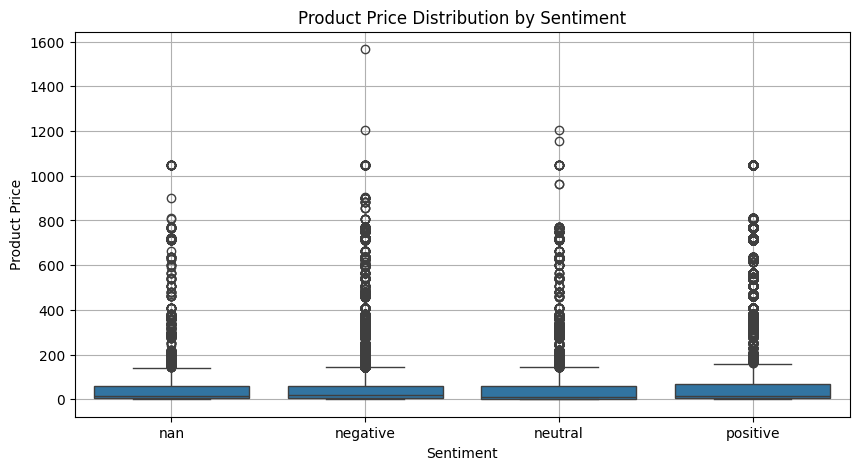

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()

## 🧩 Creating a new feature - review lenght

We will now create a new numeric feature called 'review_lenght'

that represent number of characters in each review.

Then we'll visualize how review lenght varies across different sentiment categories.


Review length summary:
count    170954.000000
mean         48.416012
std          76.670142
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
nan          4994.0  49.664798  78.605064  2.0   9.0  20.0  53.0  494.0
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


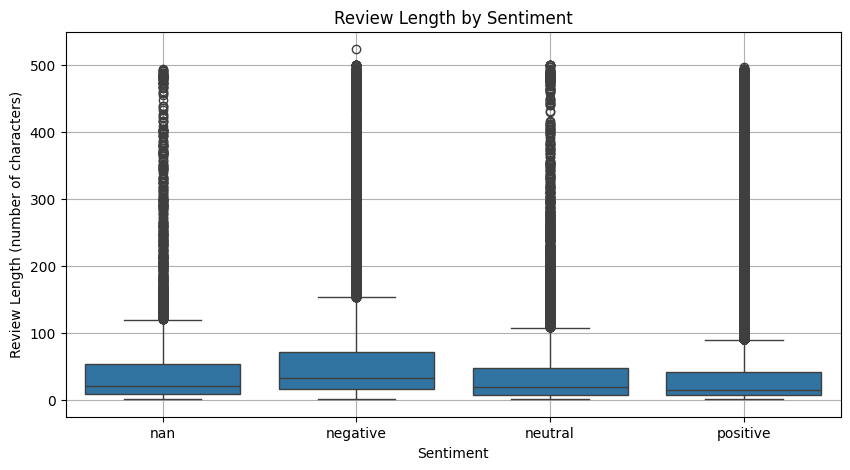

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()